In [ ]:
#green loan 

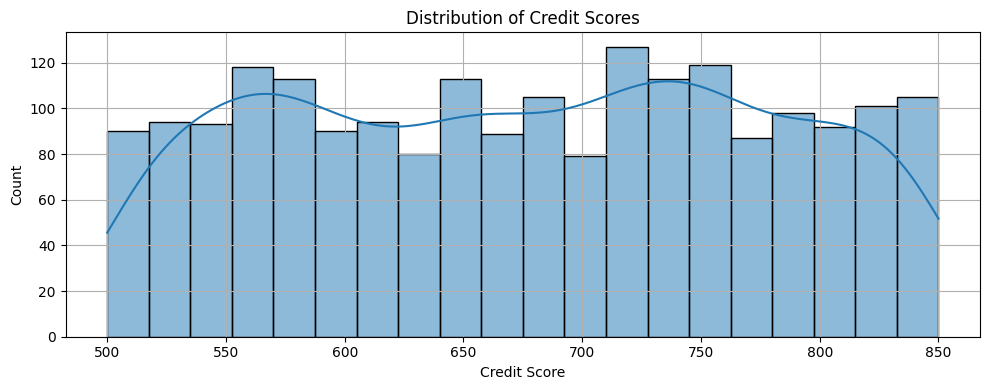

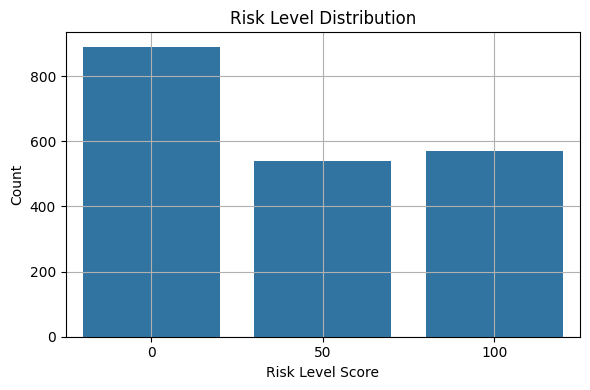

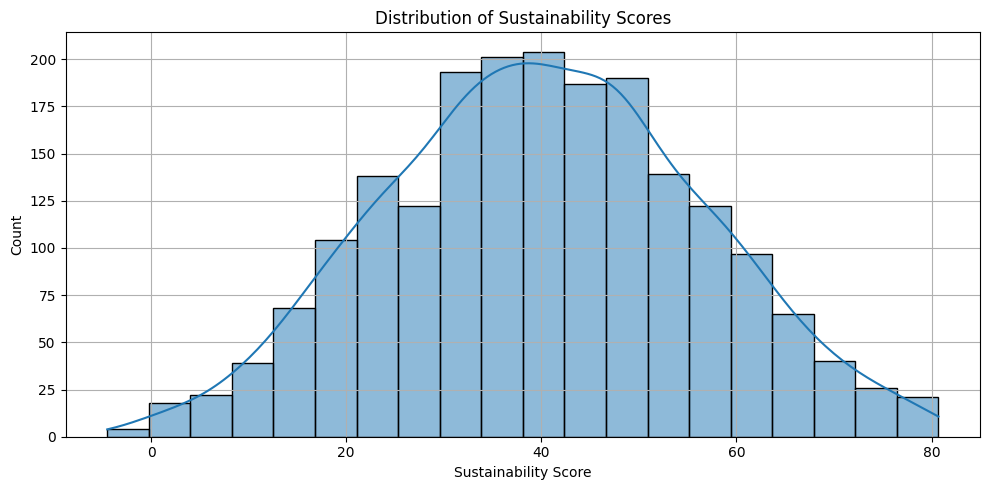

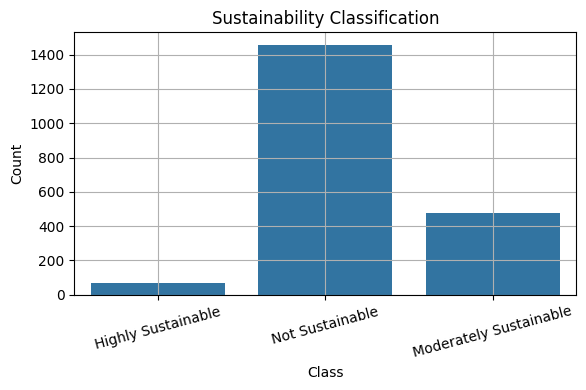

  Loan_ID  Sustainability_Score Sustainability_Class
0   L0001             80.309172   Highly Sustainable
1   L0002             40.261001      Not Sustainable
2   L0003             46.939400      Not Sustainable
3   L0004             33.343060      Not Sustainable
4   L0005             15.311073      Not Sustainable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("d:\Researchwork24-25\kaladevi\work2\synthetic_loan_prediction_dataset.csv")

# Step 1: Infer Risk_Level_Score from Credit_Score
def infer_risk_level(score):
    if score < 600:
        return 100  # High Risk
    elif 600 <= score <= 700:
        return 50   # Medium Risk
    else:
        return 0    # Low Risk

df["Risk_Level_Score"] = df["Credit_Score"].apply(infer_risk_level)

# Step 2: Convert Environmental_Certification to numeric
df["Environmental_Certification_Score"] = df["Environmental_Certification"].map({'Yes': 100, 'No': 0})

# Step 3: Normalize Energy Investment and Energy Capacity (assume Revenue as Energy Capacity)
df["Normalized_Energy_Investment"] = (df["Green_Energy_Investment (in $M)"] - df["Green_Energy_Investment (in $M)"].min()) / \
                                     (df["Green_Energy_Investment (in $M)"].max() - df["Green_Energy_Investment (in $M)"].min()) * 100

df["Normalized_Energy_Capacity"] = (df["Revenue (in $M)"] - df["Revenue (in $M)"].min()) / \
                                   (df["Revenue (in $M)"].max() - df["Revenue (in $M)"].min()) * 100

# Step 4: Calculate Sustainability Score
df["Sustainability_Score"] = (
    0.3 * df["Energy_Efficiency_Score"] +
    0.2 * df["Normalized_Energy_Investment"] +
    0.2 * df["Environmental_Certification_Score"] +
    0.2 * df["Normalized_Energy_Capacity"] -
    0.1 * df["Risk_Level_Score"]
)

# Step 5: Classify Sustainability Category
def classify(score):
    if score >= 70:
        return "Highly Sustainable"
    elif score >= 50:
        return "Moderately Sustainable"
    else:
        return "Not Sustainable"

df["Sustainability_Class"] = df["Sustainability_Score"].apply(classify)

# Step 6: Plot distributions
plt.figure(figsize=(10, 4))
sns.histplot(df["Credit_Score"], bins=20, kde=True)
plt.title("Distribution of Credit Scores")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x="Risk_Level_Score", data=df, order=[0, 50, 100])
plt.title("Risk Level Distribution")
plt.xlabel("Risk Level Score")
plt.ylabel("Count")
plt.tight_layout()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(df["Sustainability_Score"], bins=20, kde=True)
plt.title("Distribution of Sustainability Scores")
plt.xlabel("Sustainability Score")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x="Sustainability_Class", data=df)
plt.title("Sustainability Classification")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.grid(True)
plt.tight_layout()
plt.show()

# View top rows
print(df[["Loan_ID", "Sustainability_Score", "Sustainability_Class"]].head())